# 결측치 다루기

## 학습목표
- 결측치 처리방법 학습

## 핵심키워드
- isnull().sum()
- plot() / plot.bar() / plot.harh()
- reset_index
- sort_values()
- NaN
- drop()

## 학습하기

In [1]:
import pandas as pd
import numpy as np
import seaborn

import matplotlib.pyplot as plt
# window 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# 폰트가 선명하게 보이기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 데이터 불러오기
df = pd.read_csv('source/dataset.csv', low_memory=False)

### 결측치 확인하기

In [2]:
True == 1

True

In [3]:
# null 값은 True 로 표시됨
# null 값이 몇개가 있는지 합계
null_count = df.isnull().sum()

# type(null_count) => Series
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

### 결측치 시각화

<AxesSubplot:>

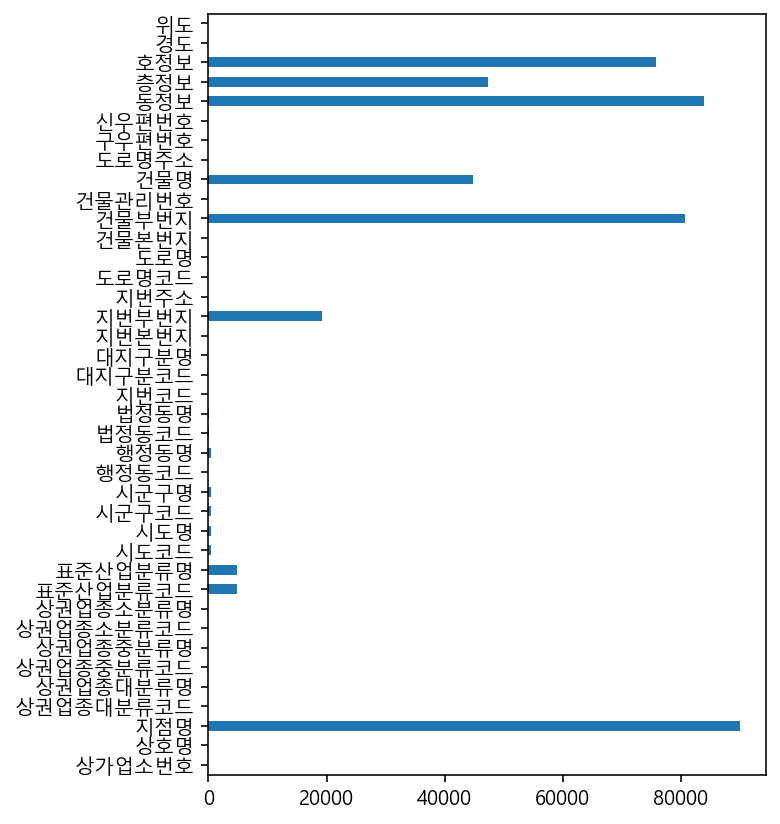

In [4]:
# 위에서 구한 결측치를 plot.bar() 를 통해 막대그래프로 표현
# null_count.plot.bar(rot=60) # 가로축 이름 각도주기

# x축 y축 바꾸기
null_count.plot.barh(figsize=(5, 7))  # 글짜가 겹쳐서 그림 사이즈를 늘려줌

In [5]:
# 위에서 계산한 결측치 수를 reset_index() 함수를 통해 데이터프레임으로 변환
# df_null_count 변수에 결과를 담아서 head() 를 통해 미리보기

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 컬럼병 변경하기

In [6]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 '컬럼명', '결측치수'fh qusrudgo wnqslek.
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 정렬하기

In [7]:
df_null_count.sort_values('결측치수', ascending=False)

# 결측치 많은 순으로 상위 10개만 출력
df_null_count_top = df_null_count.sort_values('결측치수', ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


### 특정 컬럼만 불러오기

In [8]:
# 지점명 컬럼을 불러옵니다.
# NaN == Not a Number 의 약자로 결측치를 의미합니다.

df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [9]:
# '컬렴명' 이라는 컬럼의 값만 가져와서 drop_column 변수에 담습니다.

drop_columns = df_null_count_top['컬럼명'].tolist() # Series => list 로 형변환
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [10]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


### 제거하기

In [11]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
df.shape

(91335, 39)


(91335, 29)

In [12]:
# 제거 결과를 info로 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 